# 네이버 영화 평점 기준 영화의 평점 변화 확인하기

In [1]:
from bs4 import BeautifulSoup  
import pandas as pd

In [2]:
from urllib.request import urlopen

url_base = "http://movie.naver.com/"
url_syb = "movie/sdb/rank/rmovie.nhn?sel=cur&date=20190816"

page = urlopen(url_base+url_syb)

soup = BeautifulSoup(page, "html.parser")
soup


<!DOCTYPE html>

<html lang="ko">
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="http://imgmovie.naver.com/today/naverme/naverme_profile.jpg" property="me2:image">
<meta content="네이버영화 " property="me2:post_tag">
<meta content="네이버영화" property="me2:category1"/>
<meta content="" property="me2:category2"/>
<meta content="랭킹 : 네이버 영화" property="og:title"/>
<meta content="영화, 영화인, 예매, 박스오피스 랭킹 정보 제공" property="og:description"/>
<meta content="article" property="og:type"/>
<meta content="https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&amp;date=20190816" property="og:url"/>
<meta content="http://static.naver.net/m/movie/icons/OG_270_270.png" property="og:image"/><!-- http://static.naver.net/m/movie/im/navermovie.jpg -->
<meta content="http://imgmovie.naver.com/today/naverme/naverme_profile.jpg" property="og:article:thumbnailUrl"/>
<meta content="네이버 영화" property="og:article:author"/>


In [3]:
soup.find_all('div', 'tit5')

[<div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=179518" title="주전장">주전장</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=163788" title="알라딘">알라딘</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=136900" title="어벤져스: 엔드게임">어벤져스: 엔드게임</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=164907" title="레드슈즈">레드슈즈</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=183132" title="교회오빠">교회오빠</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=18781" title="이웃집 토토로">이웃집 토토로</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=187051" title="브링 더 소울 : 더 무비">브링 더 소울 : 더 무비</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=101966" title="토이 스토리 4">토이 스토리 4</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=16208" title="퍼펙트 월드">퍼펙트 월드</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=18050" title="마녀 배달부 키키">마녀 배달부 키키

In [4]:
soup.find_all('div', 'tit5')[0]

<div class="tit5">
<a href="/movie/bi/mi/basic.nhn?code=179518" title="주전장">주전장</a>
</div>

In [5]:
soup.find_all('div', 'tit5')[0].a

<a href="/movie/bi/mi/basic.nhn?code=179518" title="주전장">주전장</a>

In [6]:
soup.find_all('div', 'tit5')[0].a.string

'주전장'

In [7]:
soup.find_all('td', 'point')

[<td class="point">9.57</td>,
 <td class="point">9.41</td>,
 <td class="point">9.38</td>,
 <td class="point">9.30</td>,
 <td class="point">9.26</td>,
 <td class="point">9.26</td>,
 <td class="point">9.11</td>,
 <td class="point">9.08</td>,
 <td class="point">9.03</td>,
 <td class="point">9.00</td>,
 <td class="point">8.92</td>,
 <td class="point">8.91</td>,
 <td class="point">8.91</td>,
 <td class="point">8.86</td>,
 <td class="point">8.74</td>,
 <td class="point">8.74</td>,
 <td class="point">8.53</td>,
 <td class="point">8.49</td>,
 <td class="point">8.49</td>,
 <td class="point">8.48</td>,
 <td class="point">8.42</td>,
 <td class="point">8.41</td>,
 <td class="point">8.29</td>,
 <td class="point">8.29</td>,
 <td class="point">8.27</td>,
 <td class="point">8.24</td>,
 <td class="point">8.09</td>,
 <td class="point">7.74</td>,
 <td class="point">7.26</td>,
 <td class="point">7.15</td>,
 <td class="point">6.92</td>,
 <td class="point">6.61</td>,
 <td class="point">6.16</td>,
 <td class

In [8]:
len(soup.find_all('td', 'point'))

36

In [9]:
soup.find_all('td', 'point')[0].string

'9.57'

In [14]:
movie_name = [soup.find_all('div', 'tit5')[n].a.string for n in range(0, len(soup.find_all('div', 'tit5')))]
movie_name

['주전장',
 '알라딘',
 '어벤져스: 엔드게임',
 '레드슈즈',
 '교회오빠',
 '이웃집 토토로',
 '브링 더 소울 : 더 무비',
 '토이 스토리 4',
 '퍼펙트 월드',
 '마녀 배달부 키키',
 '김복동',
 '마담 프루스트의 비밀정원',
 '마이펫의 이중생활2',
 '디어 헌터',
 '천로역정: 천국을 찾아서',
 '카메라를 멈추면 안 돼!',
 '극한직업',
 '엑시트',
 '기생충',
 '분노의 질주: 홉스&쇼',
 '스파이더맨: 파 프롬 홈',
 '500일의 썸머',
 '라이온 킹',
 '앵그리버드 더 무비',
 '1919 유관순',
 '존 윅 3: 파라벨룸',
 '롱 샷',
 '봉오동 전투',
 '사자',
 '유전',
 '미드소마',
 '팔로우',
 '언더 더 스킨',
 '명탐정 코난: 감청의 권',
 '극장판 엉덩이 탐정: 화려한 사건 수첩',
 '나랏말싸미']

In [15]:
movie_point = [soup.find_all('td', 'point')[n].string for n in range(0, len(soup.find_all('div', 'tit5')))]
movie_point

['9.57',
 '9.41',
 '9.38',
 '9.30',
 '9.26',
 '9.26',
 '9.11',
 '9.08',
 '9.03',
 '9.00',
 '8.92',
 '8.91',
 '8.91',
 '8.86',
 '8.74',
 '8.74',
 '8.53',
 '8.49',
 '8.49',
 '8.48',
 '8.42',
 '8.41',
 '8.29',
 '8.29',
 '8.27',
 '8.24',
 '8.09',
 '7.74',
 '7.26',
 '7.15',
 '6.92',
 '6.61',
 '6.16',
 '4.92',
 '3.91',
 '3.46']

In [18]:
date = pd.date_range('20190101', periods=100, freq='D')
date

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-06', '2019-01-07', '2019-01-08',
               '2019-01-09', '2019-01-10', '2019-01-11', '2019-01-12',
               '2019-01-13', '2019-01-14', '2019-01-15', '2019-01-16',
               '2019-01-17', '2019-01-18', '2019-01-19', '2019-01-20',
               '2019-01-21', '2019-01-22', '2019-01-23', '2019-01-24',
               '2019-01-25', '2019-01-26', '2019-01-27', '2019-01-28',
               '2019-01-29', '2019-01-30', '2019-01-31', '2019-02-01',
               '2019-02-02', '2019-02-03', '2019-02-04', '2019-02-05',
               '2019-02-06', '2019-02-07', '2019-02-08', '2019-02-09',
               '2019-02-10', '2019-02-11', '2019-02-12', '2019-02-13',
               '2019-02-14', '2019-02-15', '2019-02-16', '2019-02-17',
               '2019-02-18', '2019-02-19', '2019-02-20', '2019-02-21',
               '2019-02-22', '2019-02-23', '2019-02-24', '2019-02-25',
      

In [19]:
import urllib
from tqdm import tqdm_notebook

movie_date = []
movie_name = []
movie_point = []

for today in tqdm_notebook(date):
    html = "http://movie.naver.com/" + \
                                    "movie/sdb/rank/rmovie.nhn?sel=cur&date={date}"
    response = urlopen(html.format(date=
                                   urllib.parse.quote(today.strftime('%Y%m%d'))))
    soup = BeautifulSoup(response, "html.parser")
    
    end = len(soup.find_all('td', 'point'))
    
    movie_date.extend([today for n in range(0, end)])
    movie_name.extend([soup.find_all('div', 'tit5')[n].a.string for n in range(0, end)])
    movie_point.extend([soup.find_all('td', 'point')[n].string for n in range(0, end)])

In [20]:
len(movie_date), len(movie_name), len(movie_point)

(4287, 4287, 4287)

In [21]:
movie = pd.DataFrame({'date':movie_date, 
                      'name':movie_name, 
                      'point':movie_point})
movie.head()

,date,name,point
0,2019-01-01,보헤미안 랩소디,9.49
1,2019-01-01,헌터 킬러,9.43
2,2019-01-01,폴란드로 간 아이들,9.42
3,2019-01-01,트루먼 쇼,9.32
4,2019-01-01,점박이 한반도의 공룡2 : 새로운 낙원,9.24


In [22]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4287 entries, 0 to 4286
Data columns (total 3 columns):
date     4287 non-null datetime64[ns]
name     4287 non-null object
point    4287 non-null object
dtypes: datetime64[ns](1), object(2)
memory usage: 100.6+ KB


In [23]:
movie['point'] = movie['point'].astype(float)
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4287 entries, 0 to 4286
Data columns (total 3 columns):
date     4287 non-null datetime64[ns]
name     4287 non-null object
point    4287 non-null float64
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 100.6+ KB


In [24]:
import numpy as np

movie_unique = pd.pivot_table(movie, index=['name'], aggfunc=np.sum)
movie_best = movie_unique.sort_values(by='point', ascending=False)
movie_best.head()

,point
name,
보헤미안 랩소디,944.51
인생 후르츠,910.57
그린 북,867.62
로마,818.12
러빙 빈센트,791.93


In [33]:
tmp = movie.query('name == ["보헤미안 랩소디"]')
tmp

,date,name,point
0,2019-01-01,보헤미안 랩소디,9.49
39,2019-01-02,보헤미안 랩소디,9.49
75,2019-01-03,보헤미안 랩소디,9.49
111,2019-01-04,보헤미안 랩소디,9.49
147,2019-01-05,보헤미안 랩소디,9.49
183,2019-01-06,보헤미안 랩소디,9.48
218,2019-01-07,보헤미안 랩소디,9.48
254,2019-01-08,보헤미안 랩소디,9.48
288,2019-01-09,보헤미안 랩소디,9.48
323,2019-01-10,보헤미안 랩소디,9.48


No handles with labels found to put in legend.


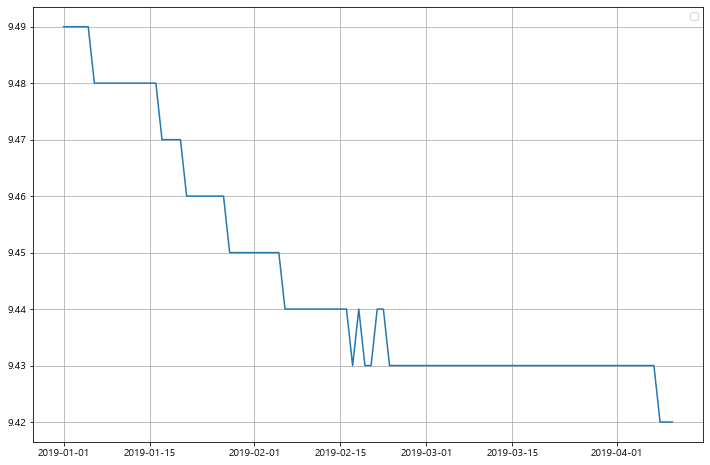

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,8))
plt.plot(tmp['date'], tmp['point'])
plt.legend(loc='best')
plt.grid()
plt.show()

In [35]:
movie_best.head(10)

,point
name,
보헤미안 랩소디,944.51
인생 후르츠,910.57
그린 북,867.62
로마,818.12
러빙 빈센트,791.93
스파이더맨: 뉴 유니버스,721.42
스타 이즈 본,713.70
가버나움,700.40
폴란드로 간 아이들,686.77


## 영화별 날짜 변화에 따른 평점 변화 확인하기

In [36]:
movie_pivot = pd.pivot_table(movie, index=["date"], 
                             columns=['name'], values=['point'])
movie_pivot.head()

point                                                       \
name       1919 유관순 7년-그들이 없는 언론 B급 며느리 PMC: 더 벙커 가버나움 가장 따뜻한 색, 블루 감시자들   
date                                                                       
2019-01-01      NaN         8.52    NaN      5.57  NaN          NaN  NaN   
2019-01-02      NaN         8.52    NaN      5.52  NaN          NaN  NaN   
2019-01-03      NaN          NaN    NaN      5.50  NaN          NaN  NaN   
2019-01-04      NaN          NaN    NaN      5.48  NaN          NaN  NaN   
2019-01-05      NaN          NaN    NaN      5.42  NaN          NaN  NaN   

                                           ...                           \
name       국가부도의 날 군산: 거위를 노래하다 그대 이름은 장미  ... 플로리다 프로젝트  플립 항거:유관순 이야기   
date                                       ...                            
2019-01-01    8.23          NaN       NaN  ...       NaN NaN        NaN   
2019-01-02    8.22          NaN       NaN  ...       NaN NaN        NaN   
2019-01-03    8.22         7.01       NaN  ...       NaN NaN        NaN   
2019-01-04    8.21         7.04       NaN  ...       NaN NaN        NaN   
2019-01-05    8.21         7.02       NaN  ...       NaN NaN        NaN   

                                                                  
name       해피 데스데이 2 유 헌터 킬러 헬보이  혈투 호두까기 인형과 4개의 왕국 홀리 모터스   히트  
date                                                              
2019-01-01         NaN  9.43 NaN NaN            7.39    NaN  9.1  
2019-01-02         NaN  9.42 NaN NaN            7.40    NaN  NaN  
2019-01-03         NaN  9.41 NaN NaN            7.40    NaN  NaN  
2019-01-04         NaN  9.41 NaN NaN            7.40    NaN  NaN  
2019-01-05         NaN  9.41 NaN NaN            7.40    NaN  NaN  

[5 rows x 171 columns]

In [37]:
movie_pivot.columns = movie_pivot.columns.droplevel()

In [38]:
movie_pivot.head()

name,1919 유관순,7년-그들이 없는 언론,B급 며느리,PMC: 더 벙커,가버나움,"가장 따뜻한 색, 블루",감시자들,국가부도의 날,군산: 거위를 노래하다,그대 이름은 장미,...,플로리다 프로젝트,플립,항거:유관순 이야기,해피 데스데이 2 유,헌터 킬러,헬보이,혈투,호두까기 인형과 4개의 왕국,홀리 모터스,히트
date,,,,,,,,,,,,,,,,,,,,,
2019-01-01,NaN,8.52,NaN,5.57,NaN,NaN,NaN,8.23,NaN,NaN,...,NaN,NaN,NaN,NaN,9.43,NaN,NaN,7.39,NaN,9.1
2019-01-02,NaN,8.52,NaN,5.52,NaN,NaN,NaN,8.22,NaN,NaN,...,NaN,NaN,NaN,NaN,9.42,NaN,NaN,7.40,NaN,NaN
2019-01-03,NaN,NaN,NaN,5.50,NaN,NaN,NaN,8.22,7.01,NaN,...,NaN,NaN,NaN,NaN,9.41,NaN,NaN,7.40,NaN,NaN
2019-01-04,NaN,NaN,NaN,5.48,NaN,NaN,NaN,8.21,7.04,NaN,...,NaN,NaN,NaN,NaN,9.41,NaN,NaN,7.40,NaN,NaN
2019-01-05,NaN,NaN,NaN,5.42,NaN,NaN,NaN,8.21,7.02,NaN,...,NaN,NaN,NaN,NaN,9.41,NaN,NaN,7.40,NaN,NaN


In [39]:
import platform
from matplotlib import font_manager, rc

path = "c:/Windows/Fonts/malgun.ttf"
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 

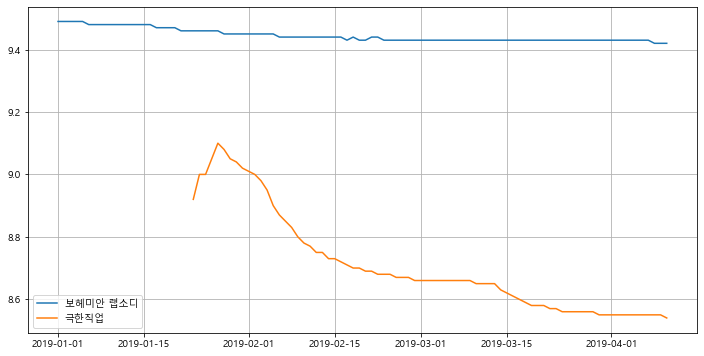

In [43]:
target_col = ['보헤미안 랩소디', '극한직업']
plt.figure(figsize=(12,6))
plt.plot(movie_pivot[target_col])
plt.legend(target_col, loc='best')
plt.grid()
plt.show()